# Regional properties of label
In this notebook we charcterize labels according to the mean and standard deviation of their propteries, such as size. If similarly sized objects are neighbors, the standard deviation of their size is low. If labels of different size are neighbors the standard deviation of their size is higher. This could be used to identify regions in tissues where cells of different size meet.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview

The data we use here was derived from maize_clsm.tif was taken from [here](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif), an image shared by David Legland under [CC-BY 4.0 license](
https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE)

StackViewNDArray([[50, 27, 27, ..., 26, 26, 26],
                  [26,  1,  2, ...,  1,  1,  1],
                  [27,  1,  1, ...,  1,  1,  1],
                  ...,
                  [33,  5,  4, ...,  1,  1,  1],
                  [36,  9,  7, ...,  1,  1,  1],
                  [57, 34, 34, ..., 25, 24, 25]], dtype=uint8)
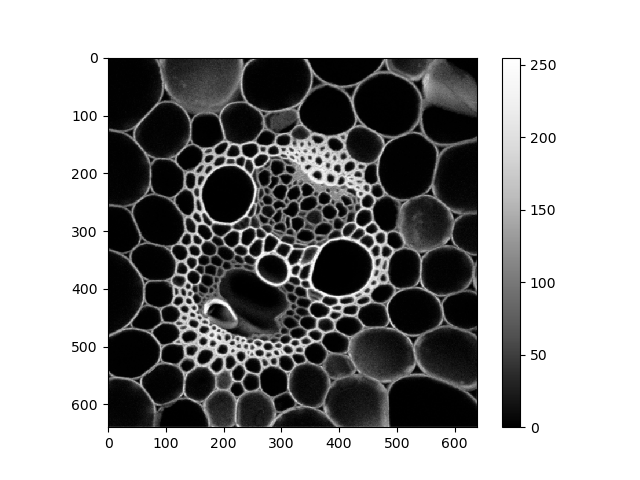
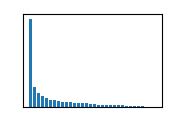

In [2]:
image = imread("../../data/maize_clsm.tif")

stackview.insight(image)

A corresponding label image looks like this:

cl.OCLArray([[  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       ...,
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234]], dtype=uint32)
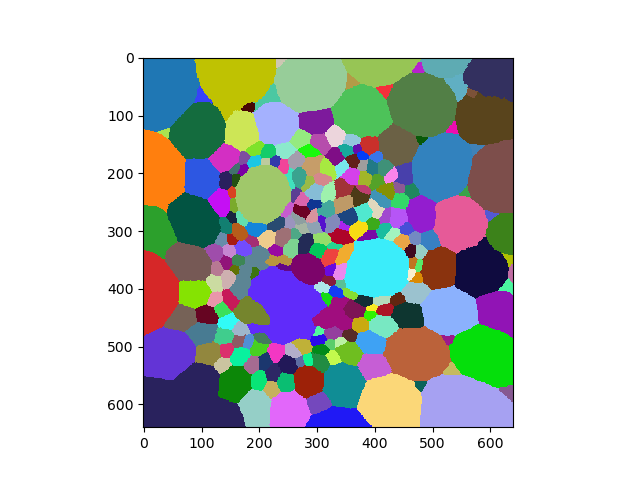

In [3]:
labels = imread("../../data/maize_clsm_labels.tif")
labels = cle.exclude_small_labels(labels, maximum_size=200)
labels = cle.extend_labeling_via_voronoi(labels)
labels

## Measuring size
First we need to quantify size of the objects. We can immediately visualize these measurements as parametric image.

cl.OCLArray([[10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       ...,
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.]],
      dtype=float32)
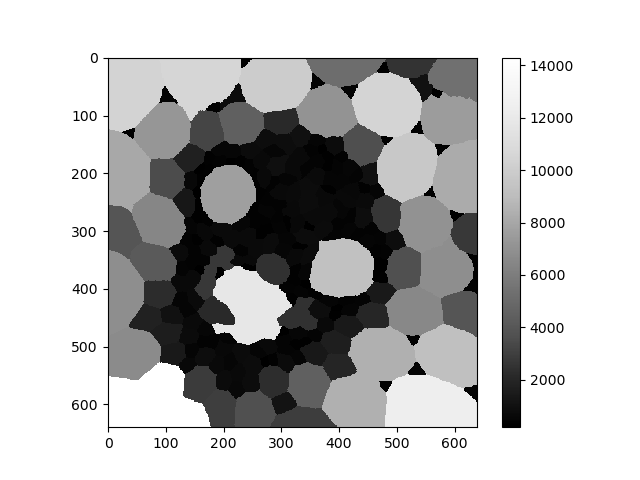
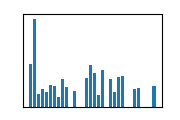

In [4]:
size_map_image = cle.pixel_count_map(labels)

size_map_image

## Regional properties
We can now summarize those measurments locally, e.g. by measuring the mean size of every cell an its corresponding touching neighbors.

cl.OCLArray([[6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       ...,
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ]], dtype=float32)
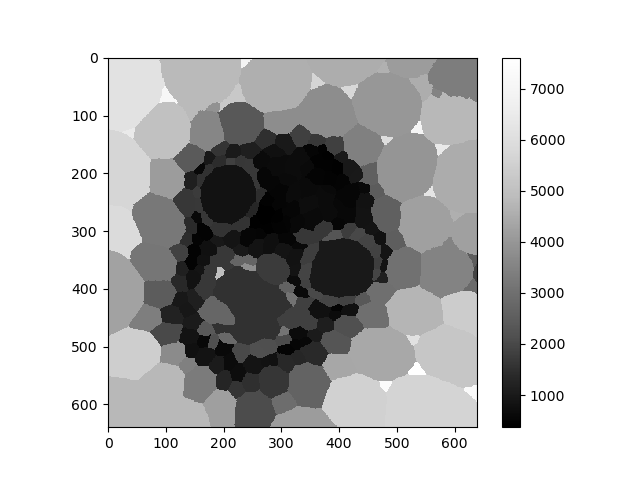
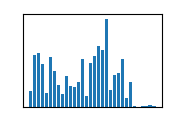

In [5]:
cle.mean_of_touching_neighbors_map(size_map_image, labels)

We can also compute the standard deviation of size, which highlights the borders between the regions with cells of different size.

cl.OCLArray([[3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       ...,
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436]], dtype=float32)
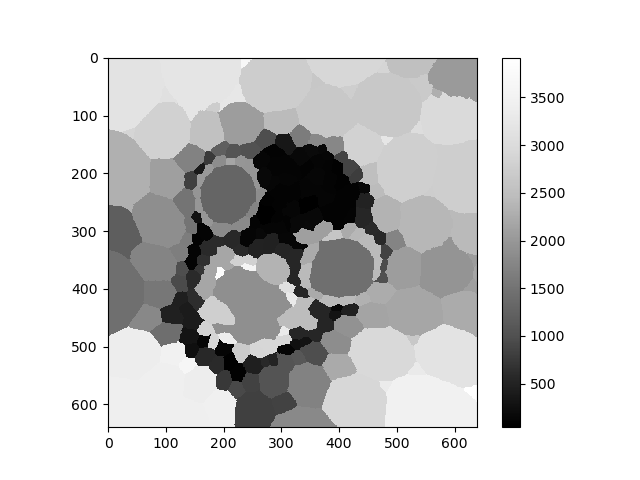
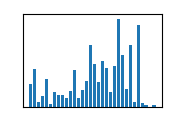

In [6]:
cle.standard_deviation_of_touching_neighbors_map(size_map_image, labels)